<a href="https://colab.research.google.com/github/Anagha-ghewari/Employee-Salary-Prediction.Anagha/blob/main/fair_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
#Employee Salary prediction using adult csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [224]:
data=pd.read_csv('/content/drive/MyDrive/Colab project work/adult 3.csv')

In [225]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [226]:
data.shape

(48842, 15)

In [227]:
data.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [228]:
data.tail(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [229]:
#finding null values
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [230]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [231]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())
#data.replace('?', pd.NA, inplace=True)
#data.dropna(inplace=True)

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-231-4268976098.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [232]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [233]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [234]:
print(data['occupation'].value_counts())


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [235]:
#replacing ? by some value
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-235-1106017034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [236]:
print(data['relationship'].value_counts())

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


In [237]:
print(data['race'].value_counts())

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


In [238]:
print(data['gender'].value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [239]:
print(data['capital-gain'].value_counts())

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
6612         1
1111         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64


In [240]:
print(data['capital-loss'].value_counts())

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2080        1
155         1
2201        1
Name: count, Length: 99, dtype: int64


In [241]:
print(data['hours-per-week'].value_counts())

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
87        1
69        1
82        1
Name: count, Length: 96, dtype: int64


In [242]:
data['native-country'].replace({'?':'Others'},inplace=True)
print(data['native-country'].value_counts())

native-country
United-States                 43832
Mexico                          951
Others                          857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

/tmp/ipython-input-242-1343682955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace({'?':'Others'},inplace=True)


In [243]:
data.shape

(48842, 15)

In [244]:
#data reduction
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [245]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [246]:
data.shape

(48811, 15)

In [247]:
data=data[data['education']!='5th-6th']
data=data[data['education']!='1st-4th']
data=data[data['education']!='Preschool']
print(data['education'].value_counts())
data.shape

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


(47972, 15)

In [248]:
data=data[data['marital-status']!='Married-spouse-absent']
data=data[data['marital-status']!='Married-AF-spouse']
print(data['marital-status'].value_counts())
data.shape

marital-status
Married-civ-spouse    21939
Never-married         15888
Divorced               6582
Separated              1484
Widowed                1466
Name: count, dtype: int64


(47359, 15)

In [249]:
data=data[data['occupation']!='Priv-house-serv']
data=data[data['occupation']!='Armed-Forces']
print(data['occupation'].value_counts())
data.shape

occupation
Prof-specialty       6097
Exec-managerial      6017
Craft-repair         5935
Adm-clerical         5503
Sales                5417
Other-service        4658
Machine-op-inspct    2844
Others               2684
Transport-moving     2272
Handlers-cleaners    1951
Tech-support         1436
Farming-fishing      1355
Protective-serv       973
Name: count, dtype: int64


(47142, 15)

In [250]:
data=data[data['race']!='Amer-Indian-Eskimo']
data=data[data['race']!='Other']
print(data['race'].value_counts())
data.shape

race
White                 40464
Black                  4470
Asian-Pac-Islander     1408
Name: count, dtype: int64


(46342, 15)

In [251]:
data=data[data['relationship']!='Other-relative']
data=data[data['relationship']!='Wife']
print(data['relationship'].value_counts())
data.shape

relationship
Husband          19079
Not-in-family    11773
Own-child         7315
Unmarried         4674
Name: count, dtype: int64


(42841, 15)

In [252]:
#data=data[data['gender']!='Female']
print(data['gender'].value_counts())
data.shape

gender
Male      30492
Female    12349
Name: count, dtype: int64


(42841, 15)

In [253]:
data=data[data['native-country']!='Holand-Netherlands']
data=data[data['native-country']!='Honduras']
data=data[data['native-country']!='Hungary']
print(data['native-country'].value_counts())
data.shape

native-country
United-States                 39373
Others                          676
Mexico                          433
Philippines                     217
Germany                         184
Canada                          160
India                           117
Puerto-Rico                     112
England                         112
Cuba                            107
South                            88
China                            88
Italy                            79
Japan                            79
El-Salvador                      79
Jamaica                          78
Poland                           68
Vietnam                          65
Columbia                         59
Taiwan                           55
Dominican-Republic               54
Portugal                         51
Haiti                            50
Iran                             47
Greece                           44
Guatemala                        40
Peru                             34
Ireland      

(42817, 15)

In [254]:
#redendency
data.drop(columns=['education'],inplace=True)
data.drop(columns=['fnlwgt'],inplace=True)
data.drop(columns=['race'],inplace=True)
data.drop(columns=['relationship'],inplace=True)
data.drop(columns=['native-country'],inplace=True)


In [255]:
data

,age,workclass,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Male,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Male,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Male,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,>50K
4,18,Others,10,Never-married,Others,Female,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,14,Married-civ-spouse,Exec-managerial,Male,0,0,40,>50K
48836,22,Private,10,Never-married,Protective-serv,Male,0,0,40,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,>50K
48839,58,Private,9,Widowed,Adm-clerical,Female,0,0,40,<=50K


<function matplotlib.pyplot.show(close=None, block=None)>

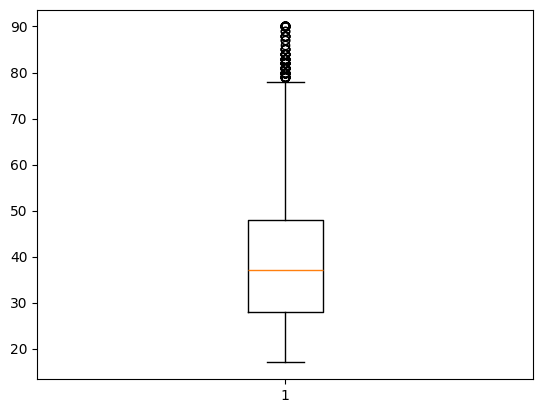

In [256]:
#outlier
plt.boxplot(data['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

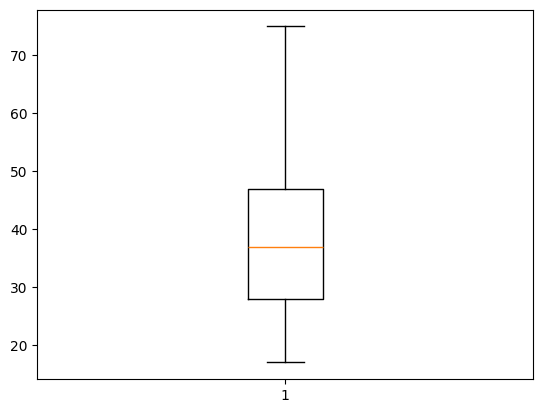

In [257]:
data=data[(data['age']<=75)& (data['age']>=17)]
plt.boxplot(data['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

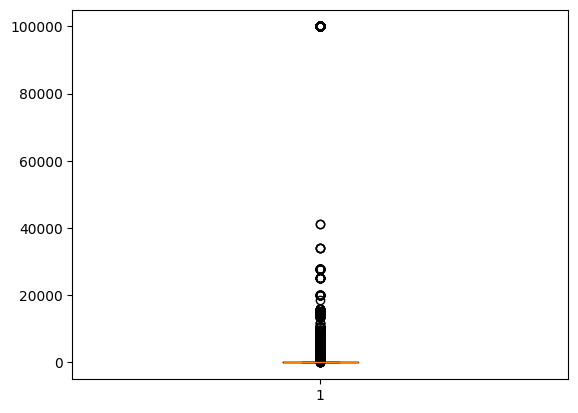

In [258]:
#outlier
plt.boxplot(data['capital-gain'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

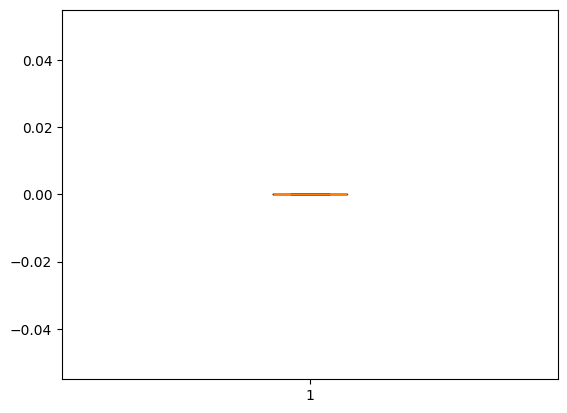

In [259]:
data=data[(data['capital-gain']<=1)]
plt.boxplot(data['capital-gain'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

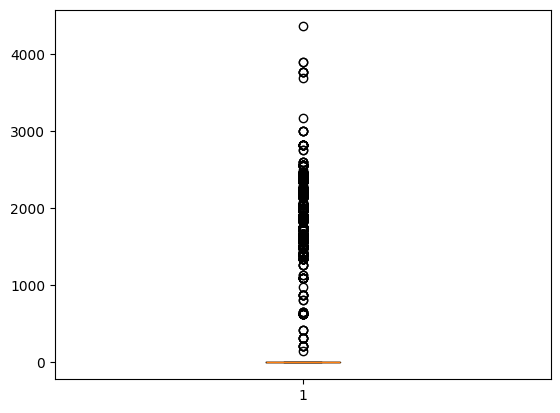

In [260]:
plt.boxplot(data['capital-loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

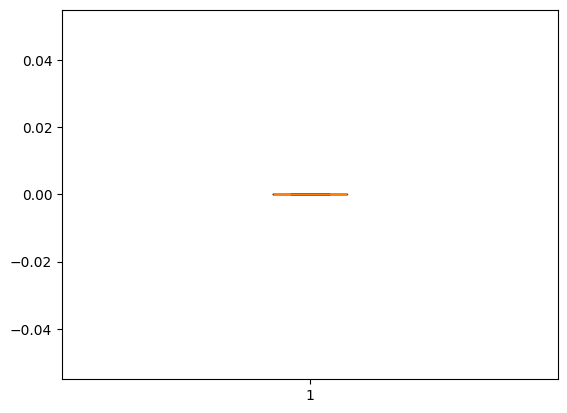

In [261]:
data=data[(data['capital-loss']<=1)]
plt.boxplot(data['capital-loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

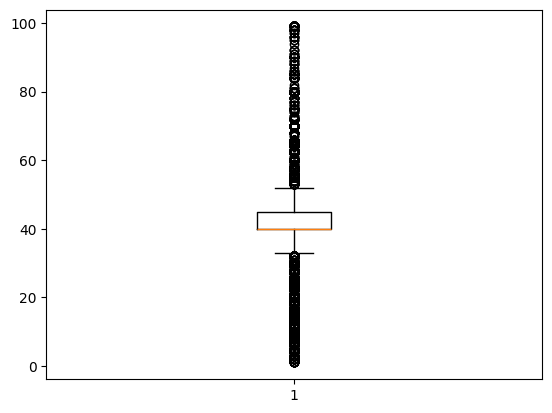

In [262]:
plt.boxplot(data['hours-per-week'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

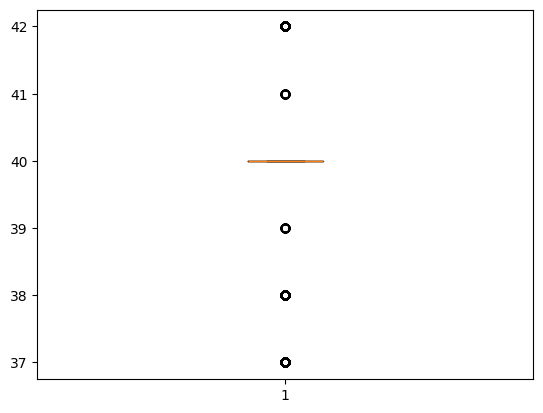

In [263]:
data=data[(data['hours-per-week']<=42)& (data['hours-per-week']>=37)]
plt.boxplot(data['hours-per-week'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

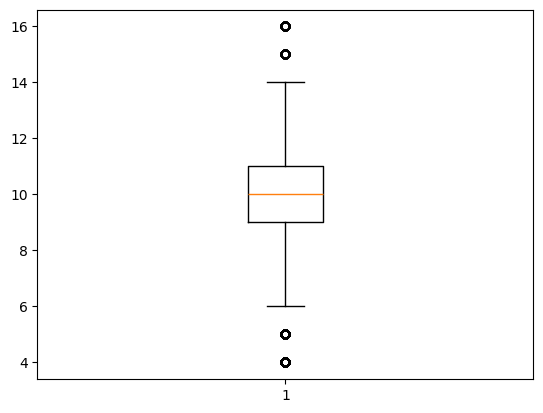

In [264]:
plt.boxplot(data['educational-num'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

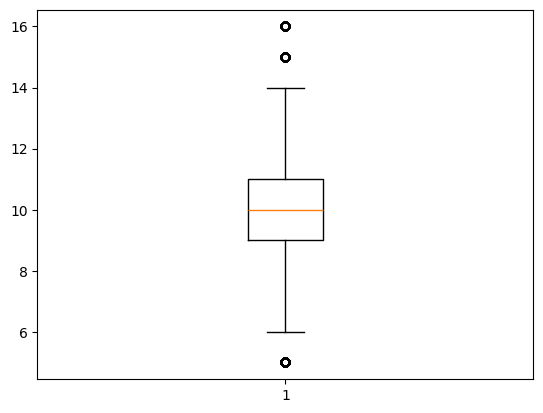

In [265]:
data=data[(data['educational-num']>=5)]
plt.boxplot(data['educational-num'])
plt.show

In [266]:
x=data.drop(columns=['income']) #input
y=data['income'] #output
x

,age,workclass,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week
0,25,Private,7,Never-married,Machine-op-inspct,Male,0,0,40
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Male,0,0,40
6,29,Others,9,Never-married,Others,Male,0,0,40
8,24,Private,10,Never-married,Other-service,Female,0,0,40
11,36,Federal-gov,13,Married-civ-spouse,Adm-clerical,Male,0,0,40
...,...,...,...,...,...,...,...,...,...
48828,43,Private,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40
48835,53,Private,14,Married-civ-spouse,Exec-managerial,Male,0,0,40
48836,22,Private,10,Never-married,Protective-serv,Male,0,0,40
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40


In [267]:
#Label encoding
encoder=LabelEncoder()
x['workclass']=encoder.fit_transform(x['workclass'])
x['marital-status']=encoder.fit_transform(x['marital-status'])
x['occupation']=encoder.fit_transform(x['occupation'])
x['gender']=encoder.fit_transform(x['gender'])
x

,age,workclass,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week
0,25,3,7,2,5,1,0,0,40
2,28,1,12,1,9,1,0,0,40
6,29,2,9,2,7,1,0,0,40
8,24,3,10,2,6,0,0,0,40
11,36,0,13,1,0,1,0,0,40
...,...,...,...,...,...,...,...,...,...
48828,43,3,9,1,5,1,0,0,40
48835,53,3,14,1,2,1,0,0,40
48836,22,3,10,2,9,1,0,0,40
48838,40,3,9,1,5,1,0,0,40


In [268]:
y

,income
0,<=50K
2,>50K
6,<=50K
8,<=50K
11,<=50K
...,...
48828,<=50K
48835,>50K
48836,<=50K
48838,>50K


In [269]:
#scaling
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.13793103, 0.5       , 0.18181818, ..., 0.        , 0.        ,
        0.6       ],
       [0.18965517, 0.16666667, 0.63636364, ..., 0.        , 0.        ,
        0.6       ],
       [0.20689655, 0.33333333, 0.36363636, ..., 0.        , 0.        ,
        0.6       ],
       ...,
       [0.0862069 , 0.5       , 0.45454545, ..., 0.        , 0.        ,
        0.6       ],
       [0.39655172, 0.5       , 0.36363636, ..., 0.        , 0.        ,
        0.6       ],
       [0.70689655, 0.5       , 0.36363636, ..., 0.        , 0.        ,
        0.6       ]])

In [270]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.2, random_state=23, stratify=y)

In [271]:
xtrain

array([[0.34482759, 0.5       , 0.45454545, ..., 0.        , 0.        ,
        0.6       ],
       [0.15517241, 0.5       , 0.63636364, ..., 0.        , 0.        ,
        0.6       ],
       [0.34482759, 0.16666667, 0.63636364, ..., 0.        , 0.        ,
        0.6       ],
       ...,
       [0.22413793, 0.5       , 0.36363636, ..., 0.        , 0.        ,
        0.6       ],
       [0.15517241, 0.5       , 0.36363636, ..., 0.        , 0.        ,
        1.        ],
       [0.39655172, 0.16666667, 0.72727273, ..., 0.        , 0.        ,
        0.6       ]])

In [272]:
#machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain ,ytrain)#input and output training data
predict=knn.predict(xtest)
predict


array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [273]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8411214953271028

In [274]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
predict1 = lr.predict(xtest)
predict1


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [275]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict1)

0.836998350742166

In [276]:
from sklearn.neural_network import MLPClassifier #binary classification using supervised learinig
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(5, 2), random_state=2, max_iter=2000)
clf.fit(xtrain, ytrain)
predict2 = clf.predict(xtest)
predict2


array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [277]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2)

0.8556899395272127

In [278]:
#Deep learning algorithms
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

x_train, x_test, y_train, y_test =  train_test_split(x ,y, test_size=0.2, random_state=42)

models={
    "LogisticRegression": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "SVN": SVC(),
    "GradientBoosting": GradientBoostingClassifier(),
}

results = {}
for name, model in models.items():
  pipe = Pipeline([
      ('scaler', StandardScaler()),
      ('model',model)
  ])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
acc = accuracy_score(y_test,y_pred)
results[name] = accuracy_score
print(f"{name}Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))





GradientBoostingAccuracy: 0.8582
              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92      2965
        >50K       0.70      0.40      0.51       673

    accuracy                           0.86      3638
   macro avg       0.79      0.68      0.71      3638
weighted avg       0.84      0.86      0.84      3638



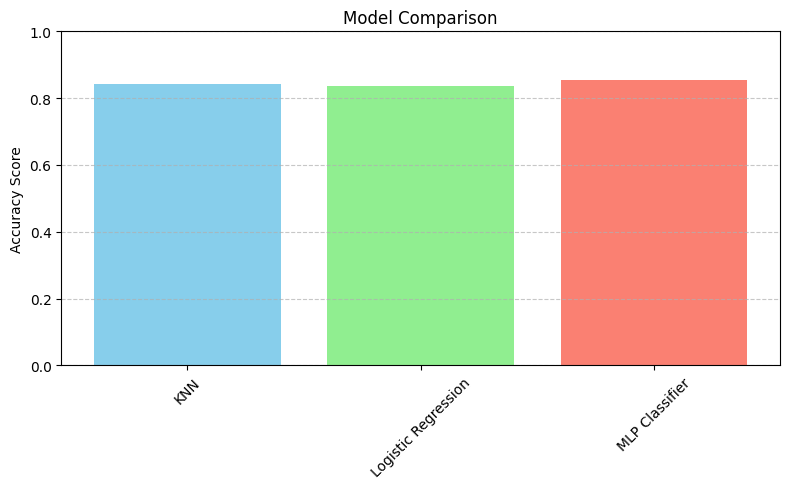

In [279]:
acc_knn = accuracy_score(ytest, predict)
acc_lr = accuracy_score(ytest, predict1)
acc_mlp = accuracy_score(ytest, predict2)

# Plotting
models = ['KNN', 'Logistic Regression', 'MLP Classifier']
accuracies = [acc_knn, acc_lr, acc_mlp]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()  #

In [280]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

x_train, x_test, y_train, y_test =  train_test_split(x ,y, test_size=0.2, random_state=42)

models={
    "LogisticRegression": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "SVN": SVC(),
    "GradientBoosting": GradientBoostingClassifier(),
}

results = {}

#Train and evlauate
from sklearn.metrics import accuracy_score

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)  # Make sure y_test is defined
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


LogisticRegression: 0.8285
KNN: 0.8425
SVN: 0.8381
GradientBoosting: 0.8582

Best model: GradientBoosting with accuracy 0.8582


In [281]:
import joblib

# Get the best model
GradientBoosting = max(results, key=results.get)
best_model = models[GradientBoosting]
print(f"\nBest model: {GradientBoosting} with accuracy {results[GradientBoosting]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("Saved best model as best_model.pkl")



Best model: GradientBoosting with accuracy 0.8582
Saved best model as best_model.pkl


In [282]:
%%writefile app.py
import stremlit as st
import pandas as pd
import joblib
#loading the training model
model = joblib.load ("best_model.pkl")
st.set_page_config(page_title="WageWizard-Employee Salary Classification", layout="centered")
st.title(" WageWizard-Employee Salary Classification App")
st.markdown("Predict weather an employee ears >50k or<=50k basced on the input features")
#slide bar inputs
st.sidebar.header("Input Employee Details")
#actual input columns
age = st.sidebar.slider("Age",18,65,30)
education = st.sidebar.selectbox("Education level",["Bachlors","Masters","Phd","HS-grad","some-college"])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of experience", 0,40,5)
occupation = st.sidebar.selectbox("Job Roles",["Prof-specialty","Exec-managerial" ,"Craft-repair" ,"Adm-clerical" ,"Sales","Other-service" ,"Machine-op-inspct" ,"Transport-moving", "Handlers-cleaners","Tech-support" ,"Farming-fishing" ,"Protective-serv"])

#buikd input data frame
input_df=pd.DataFrames({'age':[age],'education':[education],'occupation':[occupation],'hour_per_week':[hour_per_week],'experience':[experience]})
st.write("###Input Data")
st.write(input_df)
#Predict button
if st.button("Predict Saraly Class"):
prediction=model.predict(input_df)
st.success(f"Prediction : {prediction[0]}")
#Batch Prediction
st.markdown("---")
st.markdown("###Batch Prediction")
uploaded_file=st.file_uploader ("Upload a csv file for the batch prediction", type='csv')

if uploaded_file is not None:
batch_data=pd.read_csv (uploaded_file)
st.write("Uploaded data preview:", batch_data.head())
batch_preds = model.predict(batch_data)
batch_data['predictedClass'] = batch_preds
st.write("Predictions:")
st.write(batch_data.head())
csv=batch_data.to_csv(index=False)encode('utf-8')
st.download_button("Download Prediction CSV", csv, file_name='predicted_classes.csv' , mime='text/csv')

Overwriting app.py


In [283]:
!pip install streamlit pyngrok

In [284]:
!ngrok authtoken 30EeqDaRqNLiHvZzi965FST4GrV_UcZ5DN5zirdxYWtBD3RP

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [285]:
import os
import threading
def run_streamlit():
 os.system('streamlit run app.py __ server.port.8501')
thread = threading.Thread(target = run_streamlit)
thread.start()


In [287]:
from pyngrok import ngrok
import time

# Kill any existing ngrok sessions (important for free-tier accounts)
ngrok.kill()

# Wait for a moment to ensure ngrok is terminated (Optional)
time.sleep(2)

# Creating a tunnel on port 8501 (replace with your port if necessary)
public_url = ngrok.connect(8501)

print(f"Your Streamlit app is live here: {public_url}")


Your Streamlit app is live here: NgrokTunnel: "https://8ad6b2f9a576.ngrok-free.app" -> "http://localhost:8501"
